In [2]:
import numpy as np
import pandas as pd
from fastai.vision import *

In [3]:
path = Path('/notebooks'); print(path)
data_path = path
labels = pd.read_csv('/notebooks/train_labels.csv')
work_path = path/'models'

/notebooks


In [4]:
labels.rename(columns={'id': 'name'})
labels['id']='train/'+labels['id']+'.tif'

In [41]:
data = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.1,
                                                    max_warp=0.),
                              size=64).normalize(imagenet_stats)

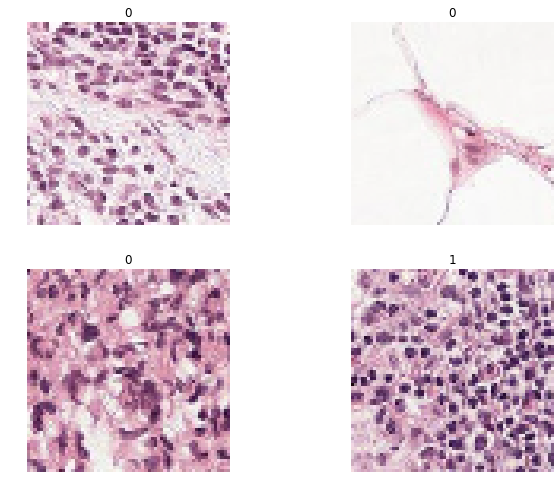

In [6]:
data.show_batch(2, figsize=(10,7))

In [42]:
def getLearner(arch, opt, loss):
    return cnn_learner(data,
                       arch,
                       opt_func = opt,
                       loss_func = loss,
                       metrics=[accuracy, AUROC()],
                       model_dir=work_path)

In [43]:
arch = models.densenet169
opt = optim.Adam
loss = nn.CrossEntropyLoss()

learn = getLearner(arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.241561,0.205068,0.923418,0.974264,09:51
1,0.190046,0.162125,0.939620,0.983085,09:47
2,0.161688,0.147707,0.945006,0.985727,09:46


In [44]:
model = models.densenet169
opt = optim.SGD
loss = nn.CrossEntropyLoss()

learn = getLearner(model, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.298880,0.263670,0.895285,0.956941,08:18
1,0.255236,0.219128,0.915419,0.970151,08:19
2,0.243356,0.201098,0.924304,0.973043,08:19
